In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data.csv', encoding = "unicode_escape")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### DATA PRE-PROCESSING

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.duplicated().sum()

5268

In [5]:
data = data.drop_duplicates()

In [6]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [7]:
data.Description = data.Description.fillna('Unknown')
data.CustomerID = data.CustomerID.fillna(0)

In [8]:
data.shape

(536641, 8)

In [9]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


<Axes: >

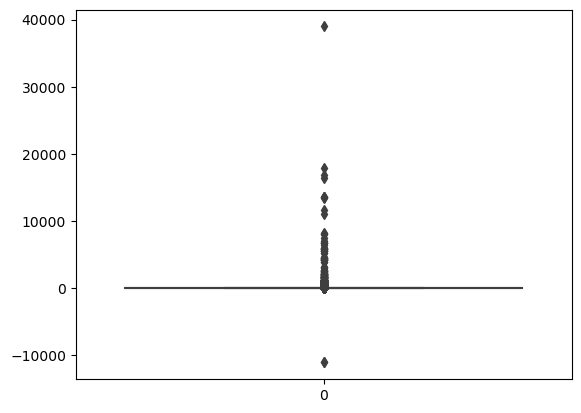

In [11]:
sns.boxplot(data=data['UnitPrice'])

In [12]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,0.0,United Kingdom


In [13]:
data[data['Description'].str.contains('debt', case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,0.0,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,0.0,United Kingdom


In [14]:
mask = data['Description'].str.contains('debt', case=False)
data = data[~mask]

In [15]:
data = data[data['Quantity'] > 0]

In [16]:
data.shape

(526051, 8)

In [17]:
data.Quantity.sum()

5645016

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [19]:
data['Time'] = data['InvoiceDate'].dt.time
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month_name()
data['Day'] = data['InvoiceDate'].dt.day_name()
data['Total'] = data['Quantity']*data['UnitPrice']

In [20]:
data.head() 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34


## Analysis

* 1. What was the best month for sales?

In [21]:
data['Year'].value_counts()

2011    484859
2010     41192
Name: Year, dtype: int64

In [22]:
best_sales_month2010 = data[data['Year'] == 2010].groupby('Month').sum()[['Total']].reset_index()
best_sales_month2010

C:\Users\lahon\AppData\Local\Temp\ipykernel_14844\3512490678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_sales_month2010 = data[data['Year'] == 2010].groupby('Month').sum()[['Total']].reset_index()


,Month,Total
0,December,821452.73


In [23]:
best_sales_month2011 = data[data['Year'] == 2011].groupby('Month').sum()[['Total']].reset_index()
best_sales_month2011

C:\Users\lahon\AppData\Local\Temp\ipykernel_14844\3332609596.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_sales_month2011 = data[data['Year'] == 2011].groupby('Month').sum()[['Total']].reset_index()


,Month,Total
0,April,536968.491
1,August,746779.320
2,December,637790.330
3,February,522545.560
4,January,689811.610
5,July,718076.121
6,June,760547.010
7,March,716215.260
8,May,769296.610
9,November,1503866.780


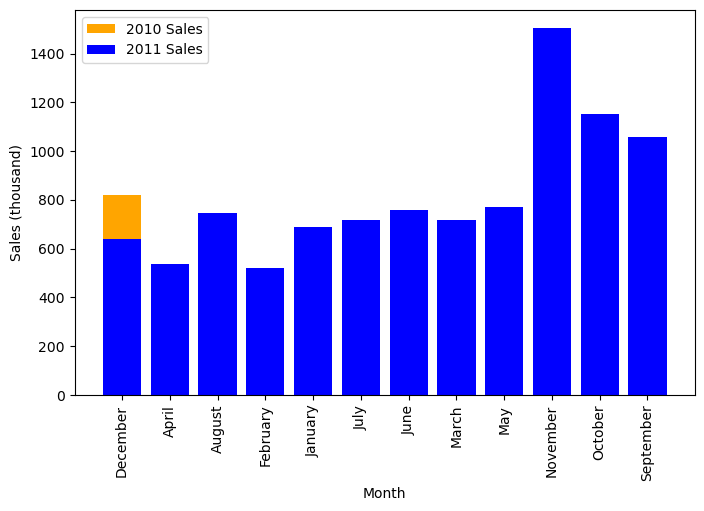

In [24]:
fg, ax = plt.subplots(figsize=(8, 5))
plt.bar(best_sales_month2010['Month'], best_sales_month2010['Total']/1000, label='2010 Sales', color='orange')
plt.bar(best_sales_month2011["Month"],best_sales_month2011['Total']/1000, label='2011 Sales', color='blue')
plt.xticks(rotation = 'vertical', size = 10);
plt.xlabel('Month')
plt.ylabel('Sales (thousand)')
plt.legend()

* 2. What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
data['Hour'] = data['InvoiceDate'].dt.hour
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34,8


In [26]:
Best_time_ads = data.groupby('Hour').count().reset_index()

In [27]:
Best_time_ads

,Hour,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total
0,6,1,1,1,1,1,1,1,1,1,1,1,1,1
1,7,379,379,379,379,379,379,379,379,379,379,379,379,379
2,8,8802,8802,8802,8802,8802,8802,8802,8802,8802,8802,8802,8802,8802
3,9,33738,33738,33738,33738,33738,33738,33738,33738,33738,33738,33738,33738,33738
4,10,47670,47670,47670,47670,47670,47670,47670,47670,47670,47670,47670,47670,47670
5,11,55592,55592,55592,55592,55592,55592,55592,55592,55592,55592,55592,55592,55592
6,12,76096,76096,76096,76096,76096,76096,76096,76096,76096,76096,76096,76096,76096
7,13,70067,70067,70067,70067,70067,70067,70067,70067,70067,70067,70067,70067,70067
8,14,65381,65381,65381,65381,65381,65381,65381,65381,65381,65381,65381,65381,65381
9,15,75851,75851,75851,75851,75851,75851,75851,75851,75851,75851,75851,75851,75851


<Axes: xlabel='Hour', ylabel='InvoiceNo'>

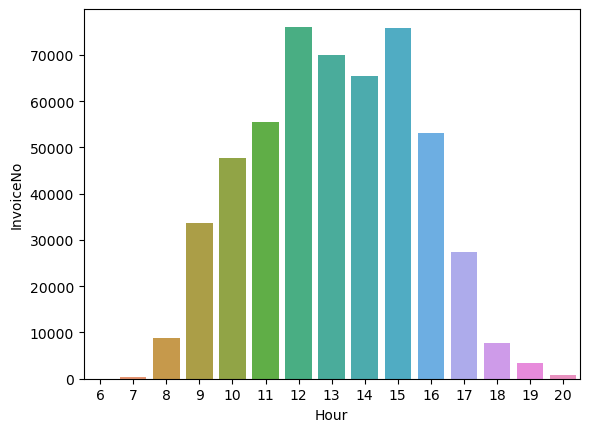

In [28]:
sns.barplot(data=Best_time_ads, x = 'Hour', y = 'InvoiceNo')

Text(0, 0.5, 'Sales')

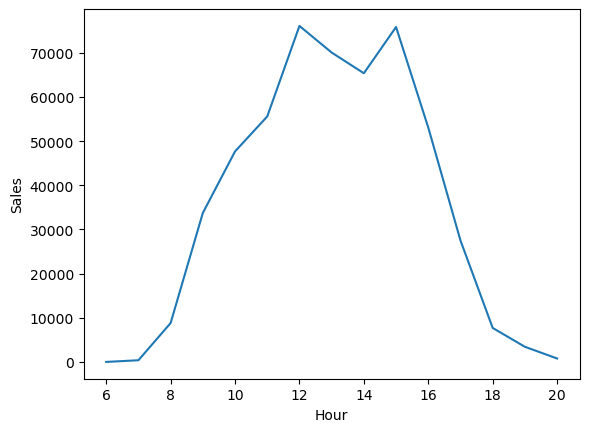

In [29]:
plt.plot(Best_time_ads['Hour'], Best_time_ads['InvoiceNo'])
plt.xlabel('Hour')
plt.ylabel('Sales')

* 3. What product sold the most ?

In [30]:
soldMost = data.groupby('Description')['Quantity'].sum().reset_index()

In [31]:
soldMost.shape

(4077, 2)

In [32]:
soldMost.sort_values('Quantity', ascending=False).head()

,Description,Quantity
2400,"PAPER CRAFT , LITTLE BIRDIE",80995
2064,MEDIUM CERAMIC TOP STORAGE JAR,78033
3950,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1826,JUMBO BAG RED RETROSPOT,48375
3860,WHITE HANGING HEART T-LIGHT HOLDER,37876


* 4. Which countries have more customers?

In [33]:
customerCountry = data.groupby(['CustomerID', 'Country'])['InvoiceNo'].count().reset_index().sort_values('InvoiceNo', ascending=False)

In [34]:
customerCountry.head()

,CustomerID,Country,InvoiceNo
7,0.0,United Kingdom,131913
4028,17841.0,United Kingdom,7676
1897,14911.0,EIRE,5672
1307,14096.0,United Kingdom,5111
343,12748.0,United Kingdom,4413


In [35]:
customerCountry = customerCountry.Country.value_counts().reset_index()

In [36]:
customerCountry.head()

,index,Country
0,United Kingdom,3922
1,Germany,94
2,France,88
3,Spain,30
4,Belgium,25


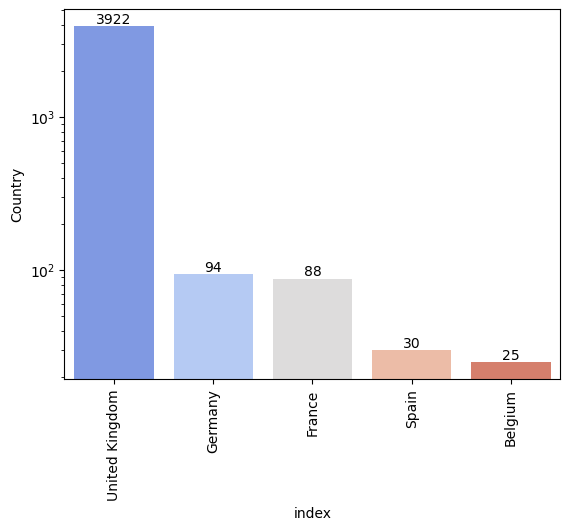

In [37]:
plt.Figure(figsize=(20, 10))
ax = sns.barplot(data=customerCountry.head(), x = 'index', y = 'Country', palette='coolwarm')
plt.xticks(rotation = 'vertical', size = 10)
plt.yscale('log');
ax.bar_label(ax.containers[0]);

* 6. which day has more number of sales?

In [38]:
day_sales = data.groupby(['Day', 'InvoiceNo']).count().reset_index()

In [39]:
day_sales.head()

,Day,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Total,Hour
0,Friday,536847,9,9,9,9,9,9,9,9,9,9,9,9
1,Friday,536848,3,3,3,3,3,3,3,3,3,3,3,3
2,Friday,536849,3,3,3,3,3,3,3,3,3,3,3,3
3,Friday,536851,15,15,15,15,15,15,15,15,15,15,15,15
4,Friday,536852,7,7,7,7,7,7,7,7,7,7,7,7


In [40]:
day_sales = day_sales.groupby('Day').InvoiceNo.count().reset_index().sort_values('InvoiceNo', ascending = False)

In [41]:
day_sales

,Day,InvoiceNo
3,Thursday,4408
5,Wednesday,3865
4,Tuesday,3717
0,Friday,3291
1,Monday,3237
2,Sunday,2207


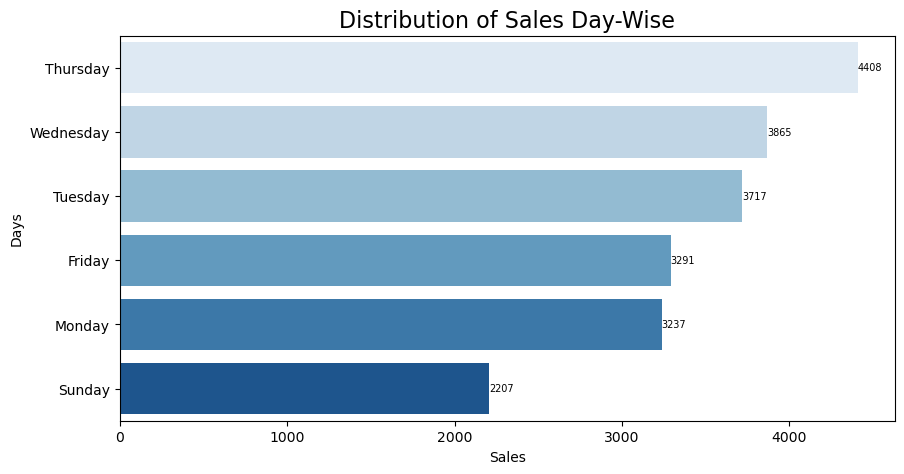

In [42]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=day_sales, x = 'InvoiceNo', y = 'Day', palette='Blues')

plt.xlabel('Sales')
plt.ylabel('Days')
plt.title('Distribution of Sales Day-Wise', fontsize = 16)

ax.bar_label(ax.containers[0], fontsize = 7);
